In [6]:
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt

In [2]:
faces = fetch_lfw_people(min_faces_per_person=60)

In [3]:
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


### Visualizing Faces

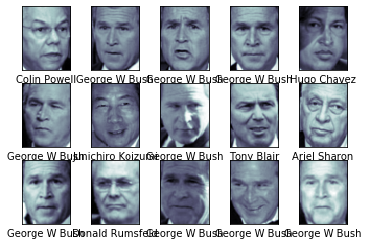

In [7]:
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
    xlabel=faces.target_names[faces.target[i]])

### Spliting Train and Test Data

In [11]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target,random_state=42)

### SVM Model

In [ ]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline
pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

### Grid Search

In [13]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

In [14]:
%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)

C:\Users\vivekanandans\AppData\Local\Continuum\miniconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Wall time: 19.9 s
{'svc__C': 10, 'svc__gamma': 0.001}


In [15]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

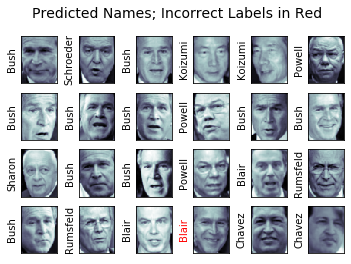

In [16]:
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],color='black' if yfit[i] == ytest[i] else 'red')
    fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)

### Classification Report

Text(76.14857142857144, 0.5, 'predicted label')

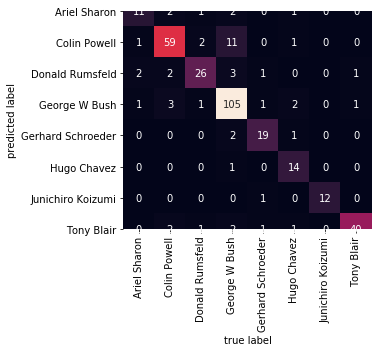

In [19]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,xticklabels=faces.target_names,yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [17]:
from sklearn.metrics import classification_report 
print(classification_report(ytest, yfit,target_names=faces.target_names))


                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.73      0.69        15
     Colin Powell       0.80      0.87      0.83        68
  Donald Rumsfeld       0.74      0.84      0.79        31
    George W Bush       0.92      0.83      0.88       126
Gerhard Schroeder       0.86      0.83      0.84        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.92      1.00      0.96        12
       Tony Blair       0.85      0.95      0.90        42

         accuracy                           0.85       337
        macro avg       0.83      0.84      0.84       337
     weighted avg       0.86      0.85      0.85       337



### Random Forest Classifier

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline
pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
rf = RandomForestClassifier(n_estimators=1000)
model = make_pipeline(pca, rf)

In [53]:
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
rf = RandomForestClassifier(max_features='sqrt')
model = make_pipeline(pca, rf)

parameter_grid = {
                 'randomforestclassifier__max_depth' : [4,5,6,7,8],
                 'randomforestclassifier__n_estimators': [200,250,500,1000],
                 'randomforestclassifier__criterion': ['gini','entropy']
                 }

# kf = KFold(n_splits=2)
# kf.get_n_splits(ytrain)

grid_search = GridSearchCV(model,param_grid=parameter_grid)

grid_search.fit(Xtrain, ytrain)

print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))


C:\Users\vivekanandans\AppData\Local\Continuum\miniconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best score: 0.4559841740850643
Best parameters: {'randomforestclassifier__criterion': 'gini', 'randomforestclassifier__max_depth': 8, 'randomforestclassifier__n_estimators': 250}


In [54]:
yfit = grid_search.predict(Xtest).astype(int)

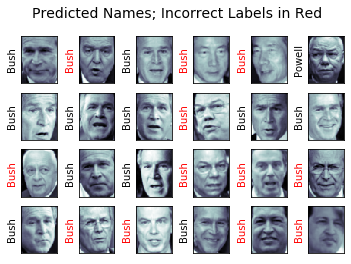

In [55]:
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],color='black' if yfit[i] == ytest[i] else 'red')
    fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)

Text(76.14857142857144, 0.5, 'predicted label')

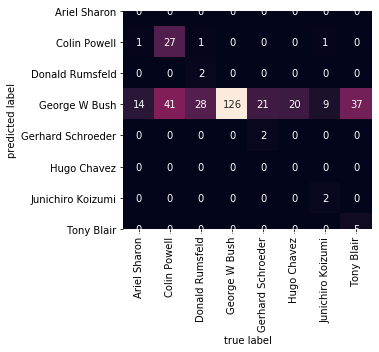

In [51]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,xticklabels=faces.target_names,yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [52]:
from sklearn.metrics import classification_report 
print(classification_report(ytest, yfit,target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.00      0.00      0.00        15
     Colin Powell       0.90      0.40      0.55        68
  Donald Rumsfeld       1.00      0.06      0.12        31
    George W Bush       0.43      1.00      0.60       126
Gerhard Schroeder       1.00      0.09      0.16        23
      Hugo Chavez       0.00      0.00      0.00        20
Junichiro Koizumi       1.00      0.17      0.29        12
       Tony Blair       1.00      0.12      0.21        42

         accuracy                           0.49       337
        macro avg       0.67      0.23      0.24       337
     weighted avg       0.66      0.49      0.39       337



C:\Users\vivekanandans\AppData\Local\Continuum\miniconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
